In [279]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import os

from scipy.signal import hilbert

In [280]:
def plot_single_trace(trace,figsize=(20,4)):
    """
    Função para plotar um único traço
    """
    fig,axes = plt.subplots(figsize=figsize)
    x = np.arange(0,len(trace))
    axes.plot(x,trace,color='black')
    axes.fill_between(x=x,y1=trace,where=(trace>0.0),color='black')
    fig.show()

## <center> Atributos single trace </center>

Os primeiros atributos estabelecidos para interpretação de dados sísmicos foram os chamados atributos <it>single trace</it>, e os primeiros a serem utilizados foram àqueles derivados do traço sísmico complexo:

<ul>
    <li> Envelope instantâneo - também conhecido como reflection stregth, é sensível a mudanças na impedância acústica e portanto é utilizado para interpretações litológicas, porosidade, hidrocarbonetos e efeito de tunning; </li>
  <li>Fase instantânea - é útil para rastrear a continuidade de refletores, e portanto, para detectar inconformidades, falhas e variações laterais na estratigrafia; e </li>
  <li>Frequência instantânea - é um atributo útil para identificar atenuações anormais e camadas sob o efeito de tunning.</li>
</ul>

## <center> Traço sísmico complexo </center>

O traço sísmico análitico ($u$) é derivado do traço sísmico registrado ($x(t)$), e é definido como:

$$u(t)=x(t)+i y(t),$$

e y(t) é a parte imaginária. O traço sísmico complexo pode ser obtido através da transformada de Hilbert da componente real, definida como:

$$y(t)=h(t)*x(t)$$

em que * denota o operador de convolução, e $h(t)$ é o operador de transformada de Hilbert, que pode ser definido como:

$$h(t) = \frac{1}{\pi t}$$

ou seja, o traço sísmico complexo pode ser obtido como:

$$
u(t)=x(t)+i \frac{1}{\pi t} * x(t)=\left[\delta(t)+i \frac{1}{\pi t}\right] * x(t)
$$

In [281]:
diretorio = os.getcwd().split('\\')[0]+'\\Dados\\F3-DEMO'

In [282]:
os.chdir(diretorio)

### Carregando o dados sísmico

In [283]:
seismic_data = segyio.open('F3_Amplitude_w_null.sgy')

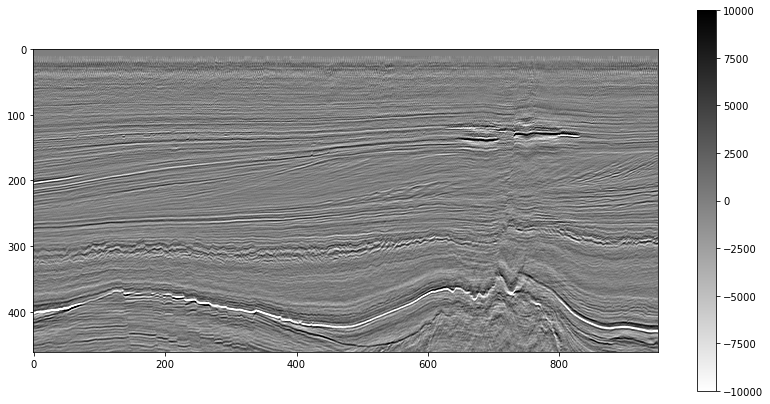

In [320]:
plt.figure(figsize=(14,7))
amp_min, amp_max =-10000, 10000
plt.imshow(seismic_data.iline[170].T,aspect='equal',cmap='gray_r',vmin=amp_min,vmax=amp_max)
plt.colorbar()

In [321]:
iline = seismic_data.iline[170]
iline.shape

(951, 462)

<ipython-input-280-76606ec1868e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


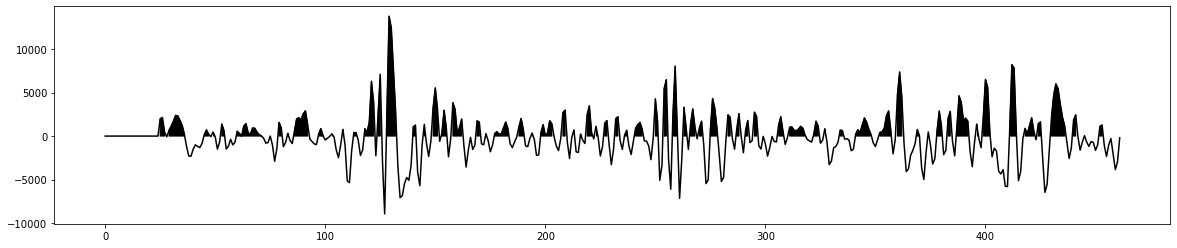

In [322]:
plot_single_trace(iline[780])

In [323]:
trace = iline[780] #tomando o traço 150 para obter o traço complexo

In [324]:
complex_trace = hilbert(trace)

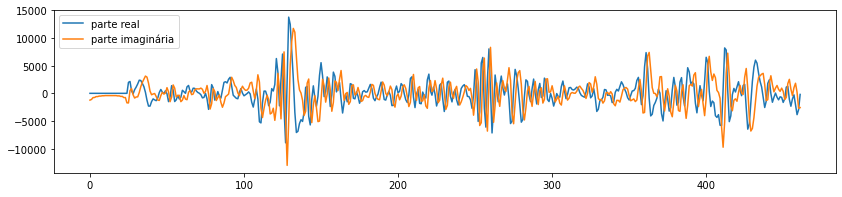

In [325]:
fig, axes = plt.subplots(figsize=(14,3))

axes.plot(complex_trace.real,label='parte real')
axes.plot(complex_trace.imag, label='parte imaginária')

axes.legend()

----

### <center> Atributos sísmicos single-trace </center>

Depois de obter o traço sísmico complexo ($u(t)$), utilizando a transformada de Hilbert:

$$u(t)=x(t)+iy(t),$$

Nós podemos obter os atributos:

#### Envelope instantâneo

$$g(t)=\sqrt{x(t)^2 + y(t)^2}$$


#### Fase instantânea

$$\phi=\arctan \left(\frac{y(t)}{x(t)}\right)$$

#### Frequência instantânea

$$\omega = \frac{\partial \phi}{\partial t}$$

#### Cosseno da fase instantânea

$$cos(\phi) = cos\left(\arctan \frac{y(t)}{x(t)}\right)$$

In [326]:
def envelope_instantaneo(complex_trace):
    return np.abs(complex_trace)

def fase_instantanea_radiano(complex_trace):
    return np.angle(complex_trace)

def fase_instantanea_graus(complex_trace):
    return np.angle(complex_trace, deg=True)

def frequencia_instantanea(fase):
    """
    fs - frequência de amostragem
    """
    return np.abs(np.diff(fase,n=1))

def cos_phase(fase_radian):
    return np.cos(fase_radian)

In [327]:
envelope = envelope_instantaneo(complex_trace) #Obtendo o envelope instantaneo
fase_radian = fase_instantanea_radiano(complex_trace)
fase = fase_instantanea_graus(complex_trace)
frequencia = frequencia_instantanea(fase)
cos_att = cos_phase(fase_radian)

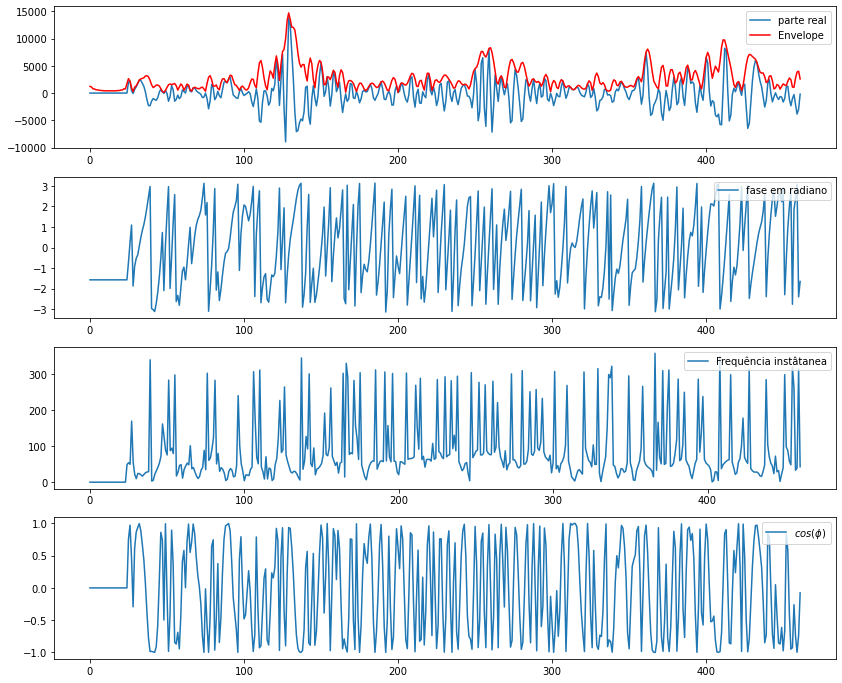

In [328]:
fig, axes = plt.subplots(nrows=4,figsize=(14,12))

axes[0].plot(complex_trace.real,label='parte real')
axes[0].plot(envelope,color='red',label='Envelope')
#axes.plot(complex_trace.imag, label='parte imaginária')

axes[1].plot(fase_radian,label='fase em radiano')

axes[2].plot(frequencia, label='Frequência instâtanea')

axes[3].plot(cos_att, label='$cos(\phi)$')

for ax in axes:
    ax.legend(loc='upper right')

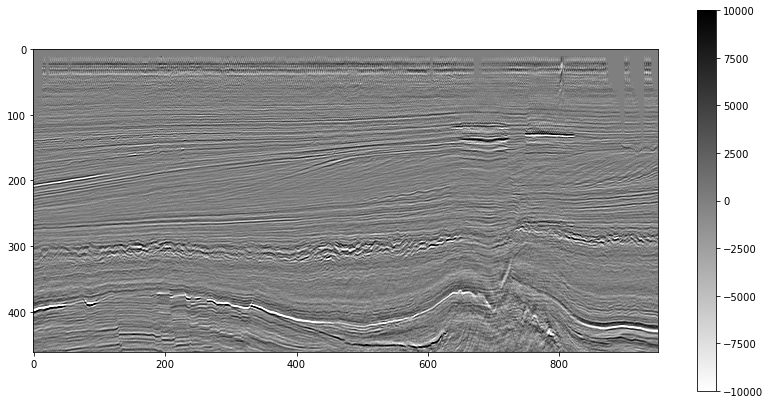

In [329]:
plt.figure(figsize=(14,7))
amp_min, amp_max =-10000, 10000
plt.imshow(seismic_data.iline[100].T,aspect='equal',cmap='gray_r',vmin=amp_min,vmax=amp_max)
plt.colorbar()

In [330]:
iline_complex_trace = hilbert(iline)
iline_envelope = envelope_instantaneo(iline_complex_trace)
iline_fase = fase_instantanea_graus(iline_complex_trace)
iline_frequencia = frequencia_instantanea(iline_fase)

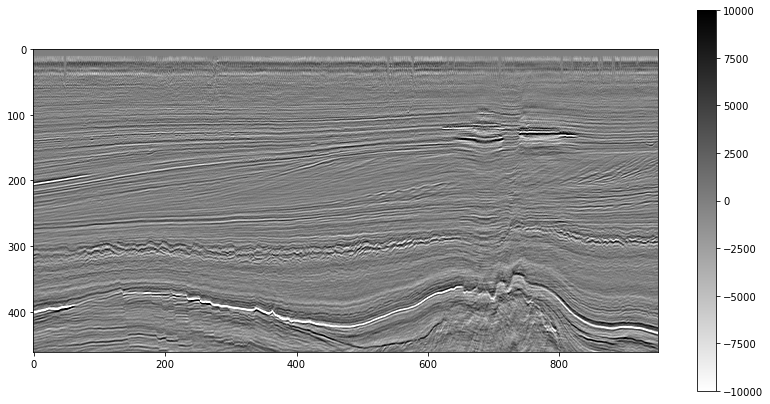

In [331]:
plt.figure(figsize=(14,7))
amp_min, amp_max =-10000, 10000
plt.imshow(seismic_data.iline[150].T,aspect='equal',cmap='gray_r',vmin=amp_min,vmax=amp_max)
plt.colorbar()

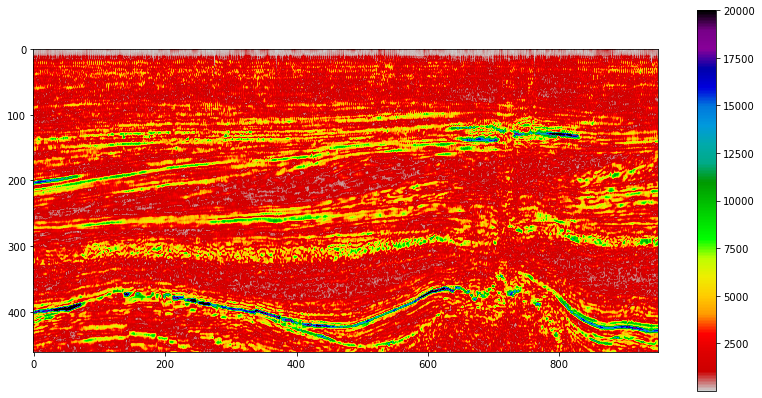

In [332]:
plt.figure(figsize=(14,7))
#amp_min, amp_max =-10000, 10000
plt.imshow(iline_envelope.T,aspect='equal',cmap='nipy_spectral_r',vmax=20000)
plt.colorbar()

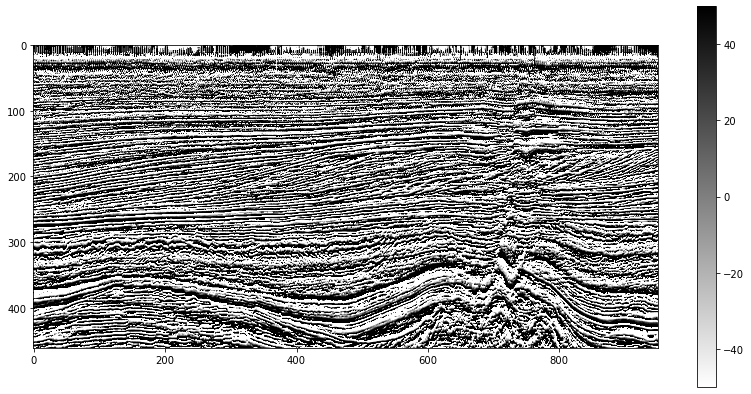

In [333]:
plt.figure(figsize=(14,7))
#amp_min, amp_max =-10000, 10000
plt.imshow(iline_fase.T,aspect='equal',cmap='gray_r',vmin=-50,vmax=50)
plt.colorbar()

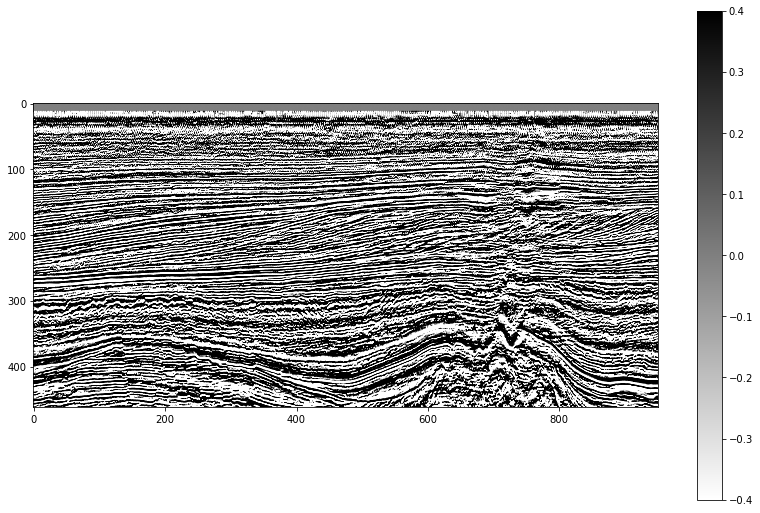

In [334]:
plt.figure(figsize=(14,9))
#amp_min, amp_max =-10000, 10000
plt.imshow(np.cos(np.deg2rad(iline_fase.T)),aspect='equal',cmap='gray_r',vmin=-0.4,vmax=0.4)
plt.colorbar()

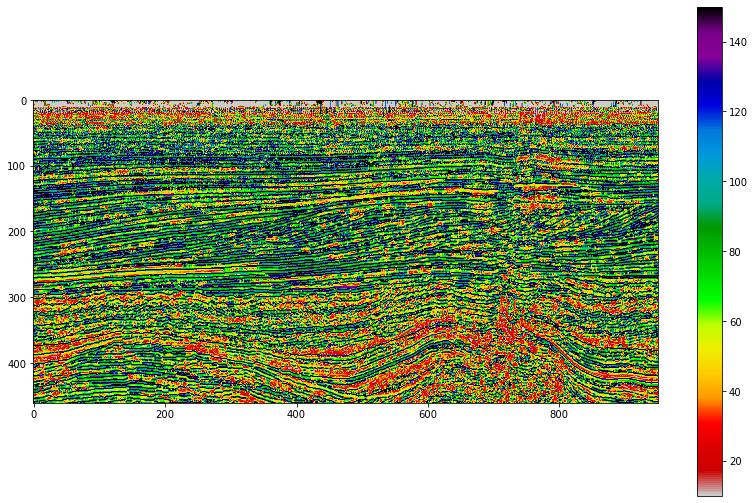

In [335]:
plt.figure(figsize=(14,9))
#amp_min, amp_max =-10000, 10000
plt.imshow(iline_frequencia.T,aspect='equal',cmap='nipy_spectral_r',vmin=10,vmax=150)
plt.colorbar()

In [336]:
n_ams_min = 30
n_ams_max = 460

n_reshape = iline.shape[0]*(n_ams_max-n_ams_min)

In [337]:
iline[:,30:460].shape

(951, 430)

In [338]:
dataset = np.asarray([iline[:,n_ams_min:n_ams_max].reshape(n_reshape),
                      iline_envelope[:,n_ams_min:n_ams_max].reshape(n_reshape),
                      iline_frequencia[:,n_ams_min:n_ams_max].reshape(n_reshape)]).T

In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [340]:
scaler = StandardScaler()
scaler.fit(dataset)

StandardScaler()

In [370]:
km = KMeans(n_clusters=4)

In [371]:
km.fit(scaler.transform(dataset))

KMeans(n_clusters=4)

In [372]:
iline_km = km.labels_

In [373]:
iline_km = iline_km.reshape(951,430)

In [374]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['green', 'red', 'blue','yellow']))

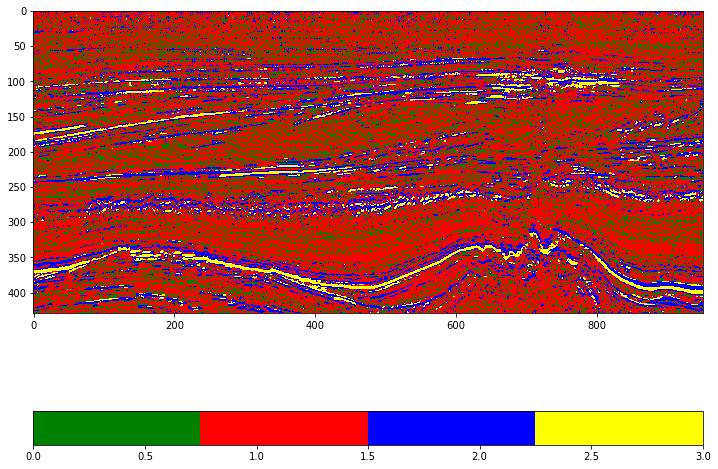

In [375]:
plt.figure(figsize=(12,12))
#amp_min, amp_max =-10000, 10000
plt.imshow(iline_km.T,aspect='equal',cmap=cmap)
plt.colorbar(orientation='horizontal')